In [17]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style = 'darkgrid', font_scale = 1.2)
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 150 

# VideoGames sale

In [18]:
vg = pd.read_csv("data/vgsales.csv")
vg.drop('Rank',axis=1, inplace=True)

vg

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [19]:
vg['Genre'] = vg['Genre'].replace('Role-Playing', 'RP')

In [20]:
vg['Year'] = vg['Year'].fillna(0)
vg['Year'] = vg['Year'].astype(int)
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16598 non-null  int64  
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [21]:
numero_di_generi = vg['Genre'].unique().shape
print(numero_di_generi)

numero_di_piattaforme = vg['Platform'].unique().shape
print(numero_di_piattaforme)


(12,)
(31,)


## Studio dei generi

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000')])

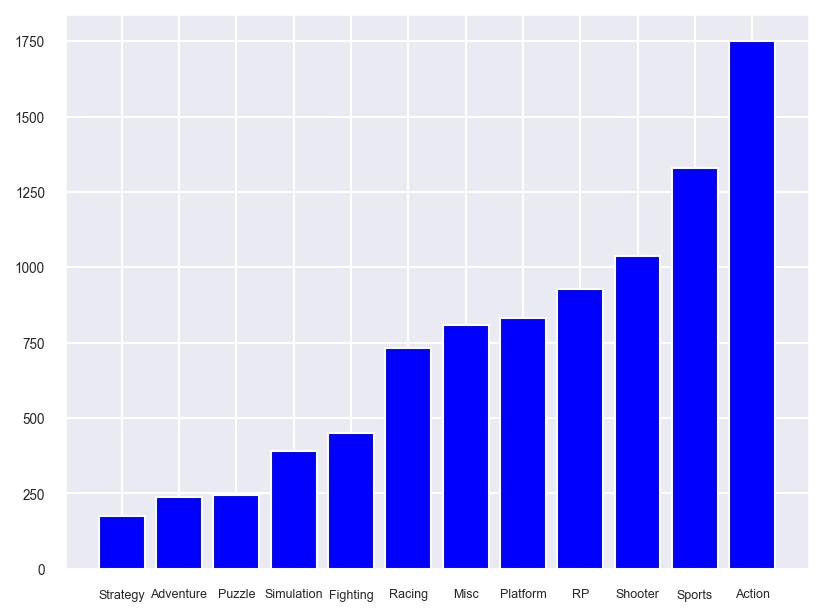

In [22]:
#creo una serie con index il genere e values la somma delle vendite per ogni genere
somma_per_genere = vg.groupby('Genre')['Global_Sales'].sum()
#ordino
somma_per_genere =  somma_per_genere.sort_values()

# Visualizza il risultato
plt.bar(somma_per_genere.index, somma_per_genere.values, color = 'blue')
plt.xticks(fontsize=6)
plt.yticks(fontsize=6.5)

(1975.0, 2018.0)

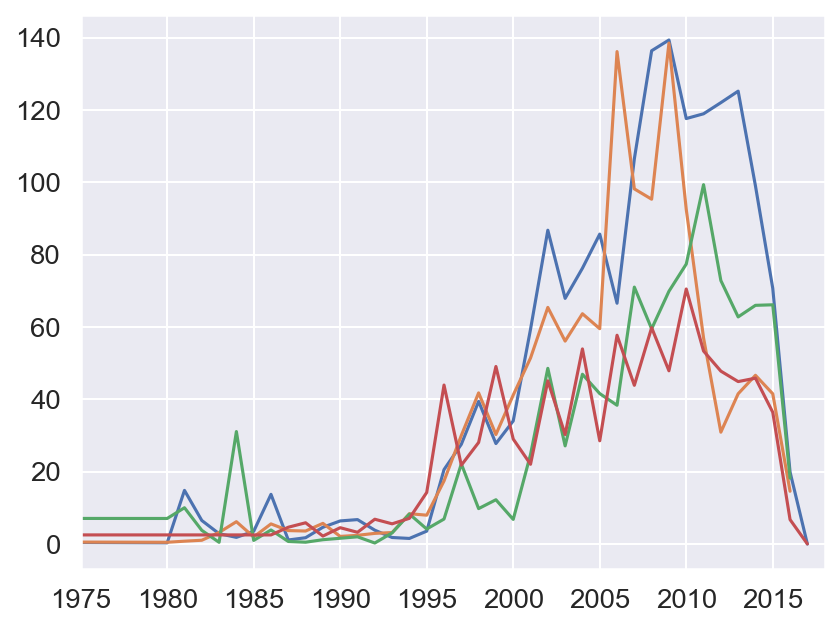

In [23]:
vg_action = vg[vg['Genre'] == 'Action']
somma_per_anno_vg_action = vg_action.groupby('Year')['Global_Sales'].sum()
plt.plot(somma_per_anno_vg_action.index, somma_per_anno_vg_action.values)
vg_sports = vg[vg['Genre'] == 'Sports']
somma_per_anno_vg_action = vg_sports.groupby('Year')['Global_Sales'].sum()
plt.plot(somma_per_anno_vg_action.index, somma_per_anno_vg_action.values)
vg_shooter = vg[vg['Genre'] == 'Shooter']
somma_per_anno_vg_shooter = vg_shooter.groupby('Year')['Global_Sales'].sum()
plt.plot(somma_per_anno_vg_shooter.index, somma_per_anno_vg_shooter.values)
vg_rp = vg[vg['Genre'] == 'RP']
somma_per_anno_vg_rp = vg_rp.groupby('Year')['Global_Sales'].sum()
plt.plot(somma_per_anno_vg_rp.index, somma_per_anno_vg_rp.values)
plt.xlim(left=1975)
plt.xlim(right=2018)

## Studio delle piattaforme

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400')])

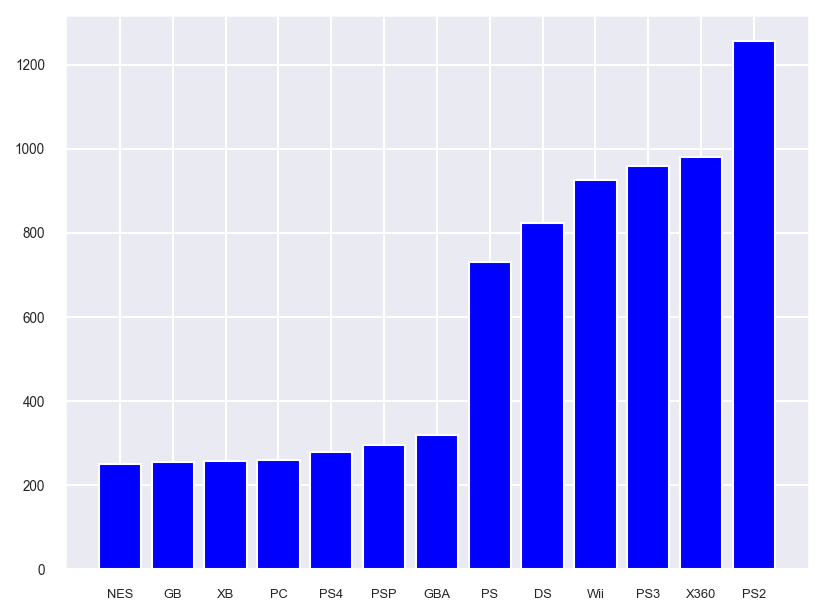

In [24]:
somma_per_piattaforma = vg.groupby('Platform')['Global_Sales'].sum()

top = somma_per_piattaforma[somma_per_piattaforma.values > 250]
#ordino
top =  top.sort_values()

# Visualizza il risultato
plt.bar(top.index, top.values, width=0.8, color = 'blue')
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)

In [25]:
numero_esclusive_PC = vg[vg["Platform"] == "PC"].shape
print(numero_esclusive_PC)
numero_esclusive_PS2 = vg[vg["Platform"] == "PS2"].shape
print(numero_esclusive_PS2)

(960, 10)
(2161, 10)


## Studio annata migliore

Text(1990, 673.9, '2008')

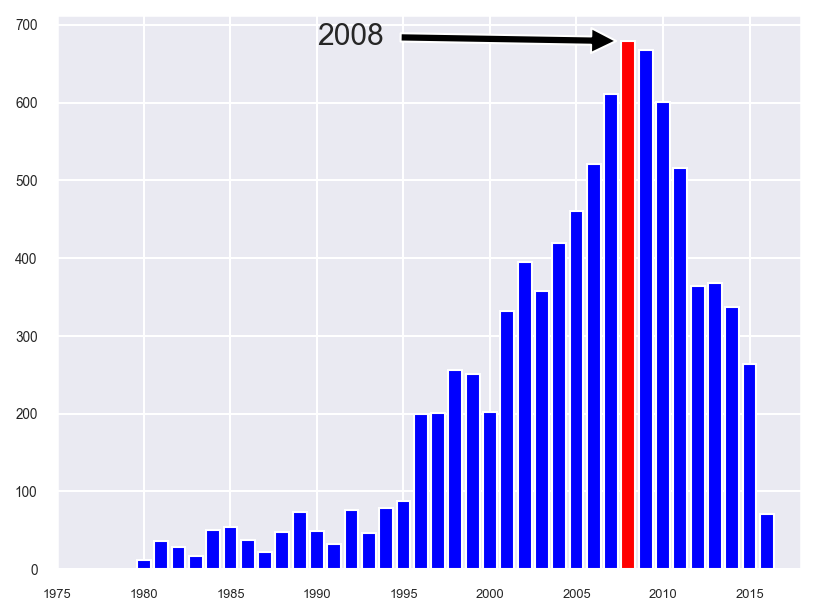

In [26]:
somma_per_anno = vg.groupby('Year')['Global_Sales'].sum()

# Visualizza il risultato
fig, ax = plt.subplots()
x = somma_per_anno.index
y = somma_per_anno.values

mask1 = y >= max(somma_per_anno.values)
mask2 = y < max(somma_per_anno.values)
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'blue')

plt.xlim(left=1975)
plt.xlim(right=2018)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)

ax.annotate(2008, xy=(2008, max(somma_per_anno.values)), xytext=(1990, max(somma_per_anno.values)-5), 
            arrowprops=dict(facecolor='black', shrink=0.05), )

## Studio per regione

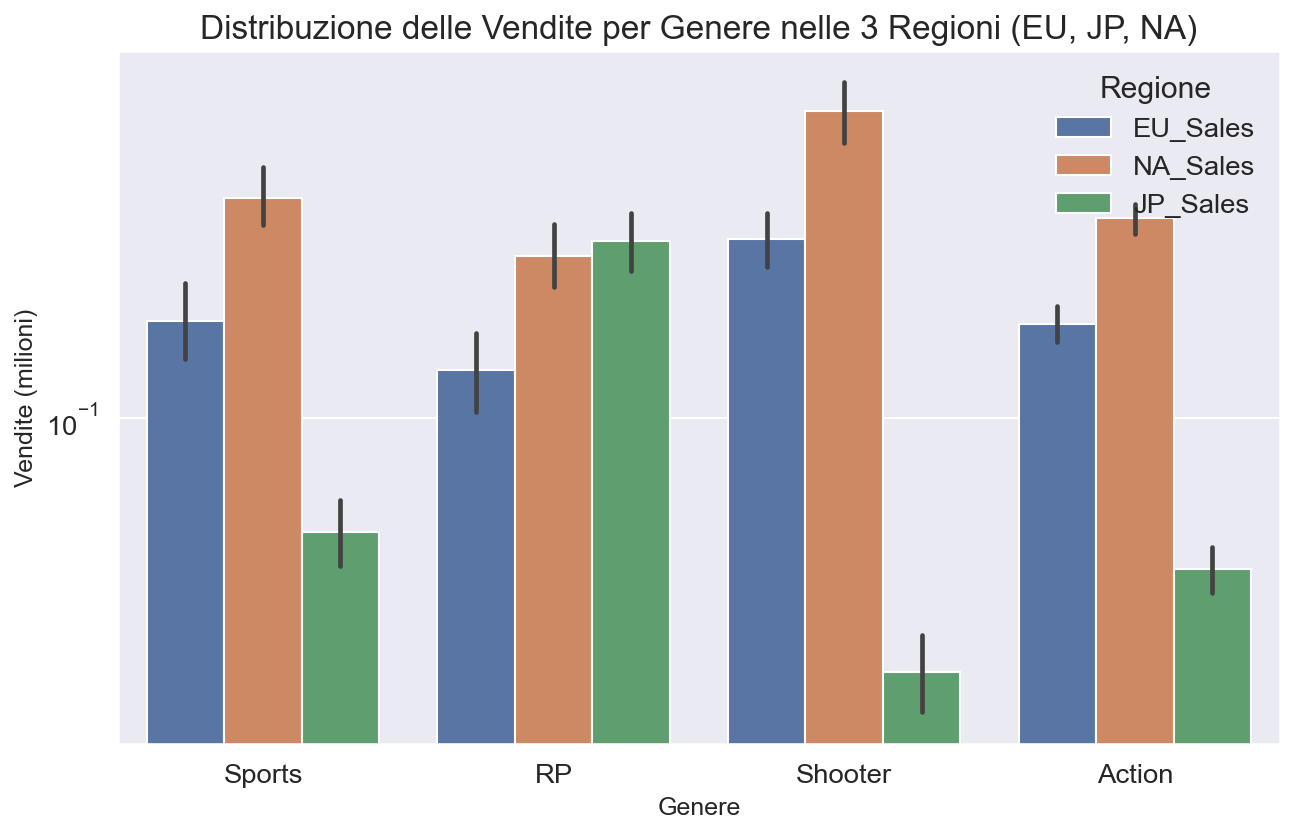

In [27]:
filtro = "Action", "RP", "Sports", "Shooter"
top_generi = vg[vg['Genre'].isin(filtro)]
# Reshape del DataFrame per unire le vendite in un'unica colonna 'Sales' e creare una colonna per la regione
data_melted = top_generi.melt(id_vars=["Genre"], value_vars=["EU_Sales", "NA_Sales", "JP_Sales"], 
                        var_name="Regione", value_name="Vendite")

# Creazione del violinplot
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x='Genre', y='Vendite', hue='Regione')

# Titolo e etichette
plt.title('Distribuzione delle Vendite per Genere nelle 3 Regioni (EU, JP, NA)', fontsize=16)
plt.xlabel('Genere', fontsize=12)
plt.ylabel('Vendite (milioni)', fontsize=12)
plt.yscale('log')
# Mostra il grafico

plt.show()


## Confronto film

In [28]:
mv = pd.read_csv("data/mvGenre.csv")

mv

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08
...,...,...,...,...,...,...,...,...,...,...
295,295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06
296,296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06
297,297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04
298,298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05


In [29]:
mv['Tickets Sold'] = (mv['Tickets Sold'] / 1_000_000).round(2)

In [30]:
mv['Genre'].unique()

array(['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller or Suspense',
       'Horror', 'Romantic Comedy', 'Musical', 'Documentary',
       'Dark Comedy', 'Western', 'Concert or Performance',
       'Multiple Genres', 'Reality'], dtype=object)

(array([1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.]),
 [Text(0, 1000.0, '1000'),
  Text(0, 1100.0, '1100'),
  Text(0, 1200.0, '1200'),
  Text(0, 1300.0, '1300'),
  Text(0, 1400.0, '1400'),
  Text(0, 1500.0, '1500'),
  Text(0, 1600.0, '1600'),
  Text(0, 1700.0, '1700')])

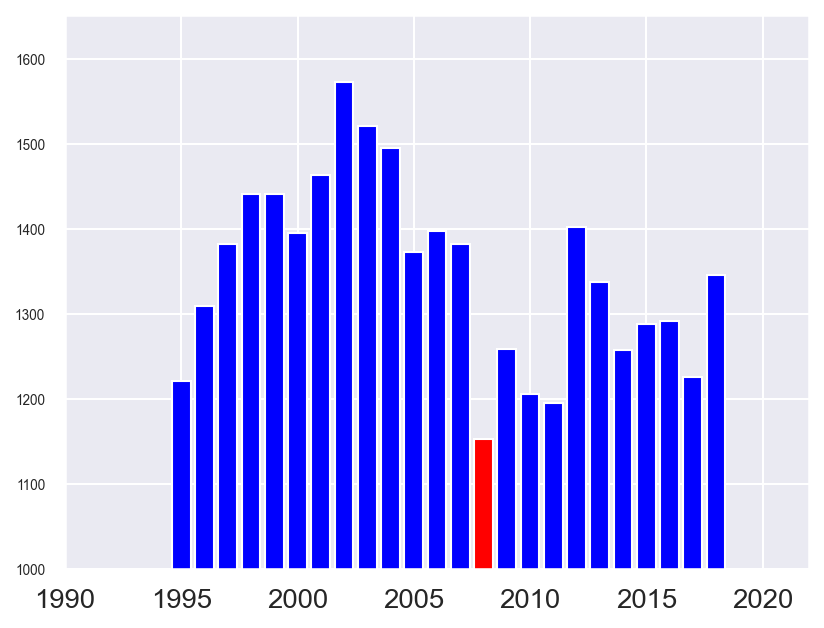

In [31]:
somma_per_anno_film = mv.groupby('Year')['Tickets Sold'].sum()

# Visualizza il risultato
fig, ax = plt.subplots()
x = somma_per_anno_film.index
y = somma_per_anno_film.values

mask1 = y <= min(somma_per_anno_film.values)
mask2 = y > min(somma_per_anno_film.values)
plt.bar(x[mask1], y[mask1], color = 'red')
plt.bar(x[mask2], y[mask2], color = 'blue')

plt.xlim(left=1990)
plt.xlim(right=2022)
plt.ylim(bottom=1000)
plt.yticks(fontsize=6.2)
plt.yticks(fontsize=6.5)

<Axes: ylabel='Global_Sales'>

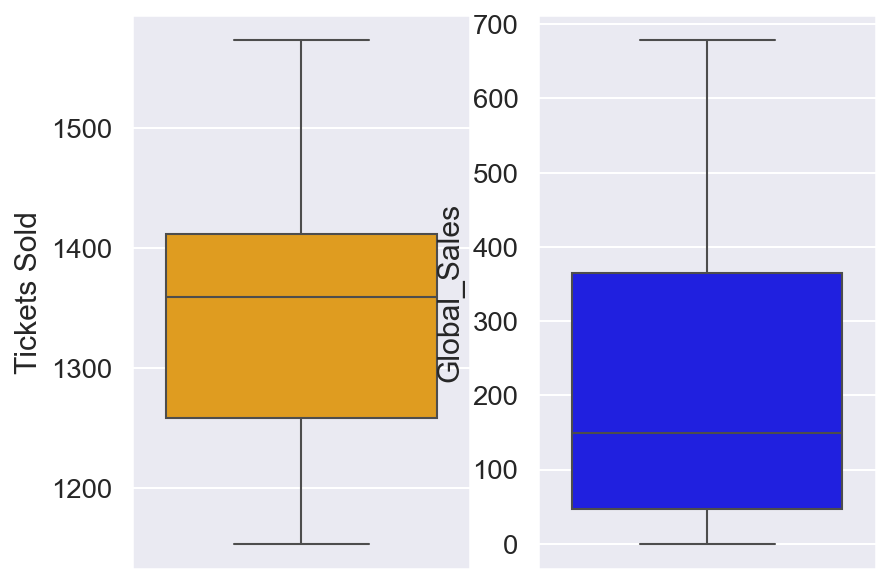

In [37]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(somma_per_anno_film, ax = axes[0], color = 'orange')
sns.boxplot(somma_per_anno, ax = axes[1], color = 'blue')

(1990.0, 2022.0)

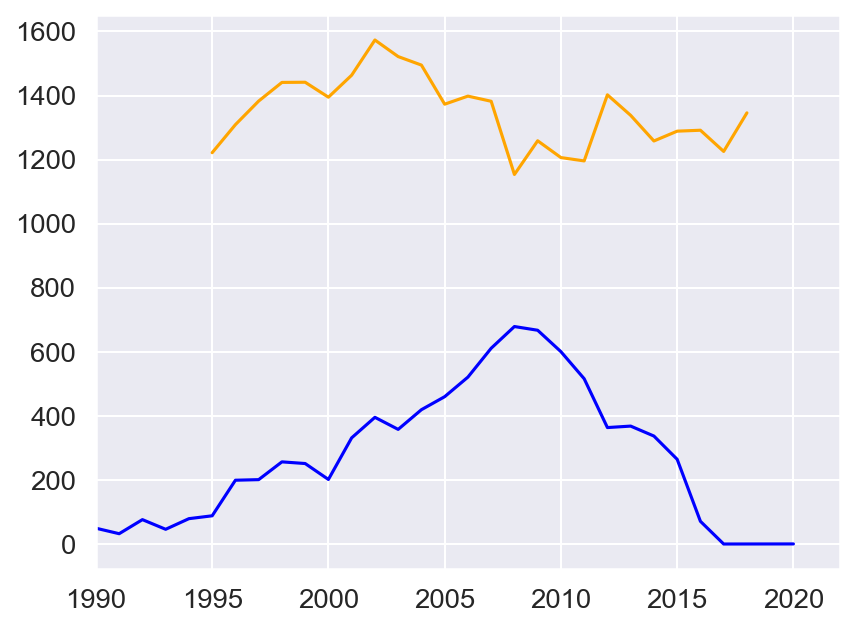

In [33]:
plt.plot(somma_per_anno_film.index, somma_per_anno_film.values, color = 'orange')
plt.plot(somma_per_anno.index, somma_per_anno.values, color = 'blue')
plt.xlim(left=1990)
plt.xlim(right=2022)

<BarContainer object of 23 artists>

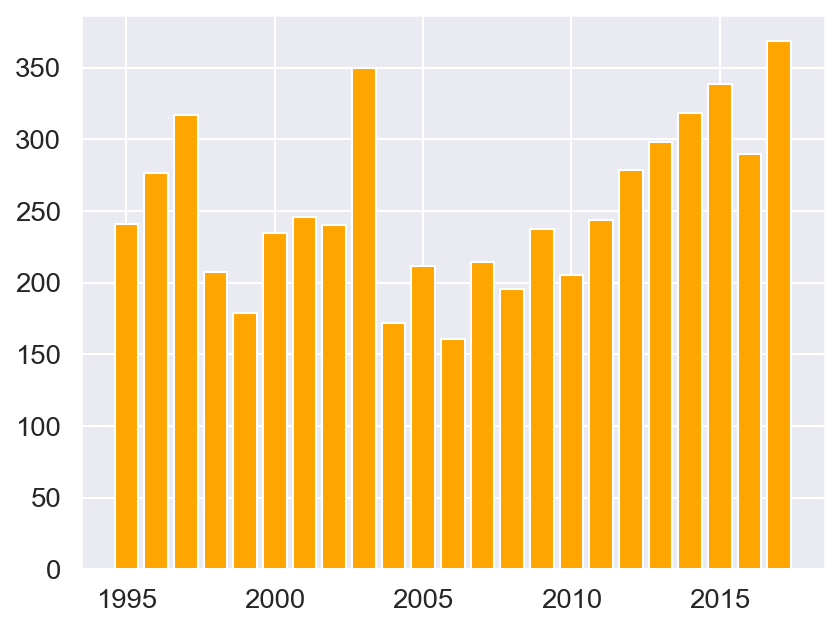

In [34]:
action = mv[(mv['Genre']=='Action') & (mv['Year'] <= 2017)]


plt.bar(action['Year'], action['Tickets Sold'], color = 'orange')

<BarContainer object of 23 artists>

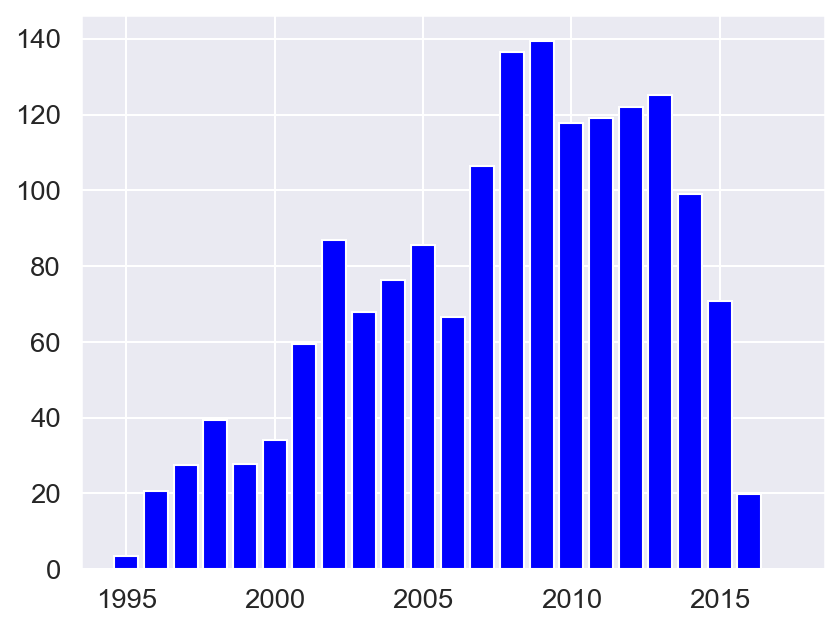

In [35]:
action_vg = vg[(vg['Genre']=='Action') & (vg['Year'] >= 1995)]

somma_per_anno_action = action_vg.groupby('Year')['Global_Sales'].sum()
plt.bar(somma_per_anno_action.index, somma_per_anno_action.values, color = 'blue')


<BarContainer object of 23 artists>

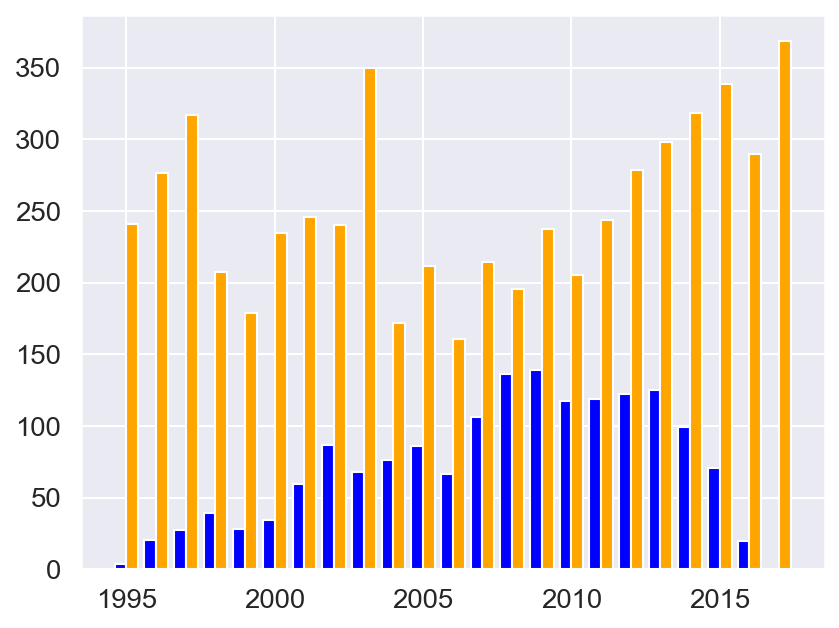

In [36]:
x1 = somma_per_anno_action.index
y1 = somma_per_anno_action.values

x2 = action['Year']
y2 = action['Tickets Sold']

# Controlla che gli anni corrispondano
assert np.array_equal(x1, x2), "Gli anni delle due serie non corrispondono!"

# Parametri per le barre
width = 0.4  # Larghezza delle barre

# Grafico a barre affiancate
plt.bar(x1 - width / 2, y1, width=width, label='Vendite Globali', color='blue')
plt.bar(x2 + width / 2, y2, width=width, label='Biglietti Venduti', color='orange')